In [12]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from tqdm import tqdm
from matplotlib import cm
import matplotlib.animation as animation

2.Resolver la ecuación diferencial de conducción de calor 2D en el siguiente dominio rectangular:$(x, y) \in R = [0, 1] \times [0, 1]$, $t \geq 0$. $\alpha = \beta = 1$, la discretización es $\Delta x = \Delta y = 0.2$ y $\Delta t = 0.1$. $T_{max} = 1 s$. La ecuación diferencial tiene las siguientes
condiciones:

a) Condición inicial: $$u(x,y,0)=\sin(\pi(x+y)) $$
b) Condiciones de frontera: $$u(0,y,t)=e^{-2\pi^2t}\sin(\pi y) $$
$$u(x,0,t)=e^{-2\pi^2t}\sin(\pi x) $$
$$u(x,1,t)=e^{-2\pi^2t}\sin(\pi(1+ y)) $$
$$u(1,y,t)=e^{-2\pi^2t}\sin(\pi(1+ x)) $$


In [13]:
#Condiciones iniciales y parámetros
deltax = 0.2
deltay = 0.2
deltat = 0.1

x = np.arange(0,1.01,deltax)
y = np.arange(0,1.01,deltay)
t = np.arange(0,1,deltat)

alpha = 1.
beta = 1.
omega = 0.1/4

lambda_ = (alpha*deltat)/(deltax**2)
mu_ = (beta*deltat)/(deltay**2)

def initT():
    T = np.zeros((len(t),len(x),len(y)))
    for l in range(len(t)):
        T[l,:,0] = np.e**(-2*t[l]*np.pi**2)*np.sin(np.pi*y)
        T[l,0,:] = np.e**(-2*t[l]*np.pi**2)*np.sin(np.pi*x)
        T[l,:,-1] = np.e**(-2*t[l]*np.pi**2)*np.sin(np.pi*(1+y))
        T[l,-1,:] = np.e**(-2*t[l]*np.pi**2)*np.sin(np.pi*(1+x))
    
    return T

T = initT()

In [14]:
def GetSolution(omega):
    
    for l in tqdm(range(1,len(t))):  
        for i in range(1,len(x)-1):
            for j in range(1,len(y)-1):
                T[l,i,j] += omega*(((1-2*lambda_-2*mu_)*T[l-1,i,j] + \
                lambda_*(T[l-1,i+1,j] + T[l-1,i-1,j]) + \
                mu_*(T[l-1,i,j+1] + T[l-1,i,j-1]))-T[l,i,j])
                
GetSolution(omega)

100%|██████████| 9/9 [00:00<?, ?it/s]


<IPython.core.display.Javascript object>


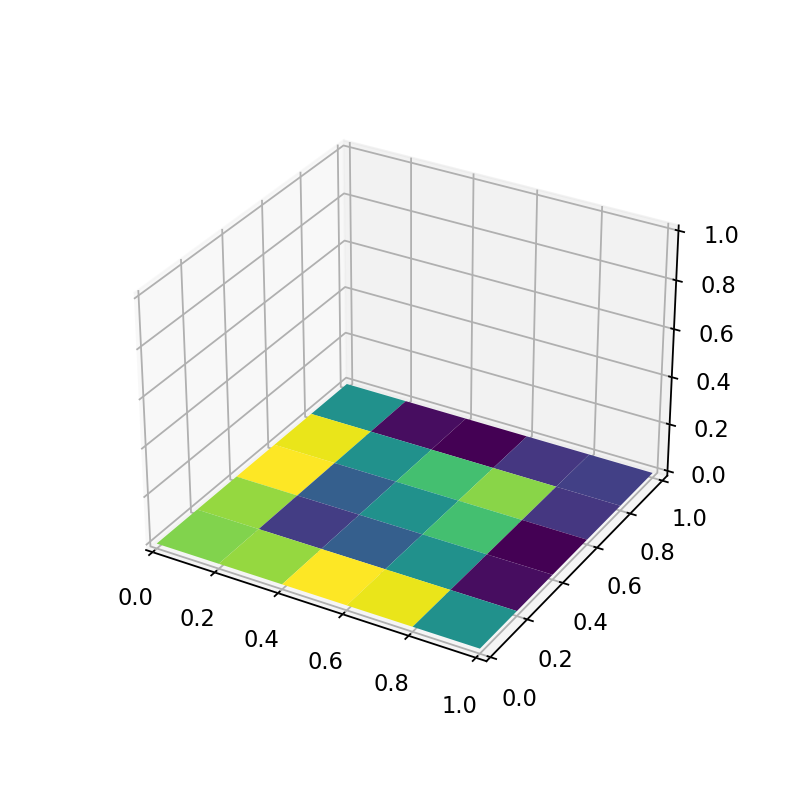

In [16]:
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111, projection='3d')

X,Y = np.meshgrid(x,y)

def init():
    
    ax.set_xlim3d(0,1.01)
    ax.set_ylim3d(0,1.01)
    ax.set_zlim3d(0,1)

def Update(i):
    ax.clear()
    init()
    ax.plot_surface(X,Y,T[i,:,:],cmap='viridis')
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init,repeat=False)

3.Demuestre la Ecuación
$$u_{i,j}^{l+1} = \textit{v}^2 \big[u_{i+1,j}^{l}-2u_{i,j}^{l}+u_{i-1,j}^{l} + \frac{\Delta \rho}{\rho[i]}(u_{i,j}^{l}-u_{i-1,j}^{l}) + \left(\frac{\lambda}{\rho[i]} \right)^2 (u_{i,j+1}^{l}-2u_{i,j}^{l}+u_{i,j-1}^{l}) \big] +2u_{i,j}^{l}-u_{i,j}^{l-1}$$

**Respuesta:** Para ello se demostrarará, mediante un cambio de coordenadas cilíndricas, el laplaciano d ela ecuación de onda en las mismas. Sea el cambio de coordenadas:
$$x=\rho \cos(\phi)  \quad \quad y = \rho \sin(\phi) $$
$$\rho=\sqrt(x^2+y^2)  \quad \quad \phi = \arctan\left(\frac{y}{x}\right) $$
Y la forma del laplaciano para una onda en 2D con desplazamiento uniforme:
$$\frac{\partial^2 u}{\partial t^2}=\alpha^2 \left[\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}\right]$$ 
Podemos expresar dicho laplaciano dado el cambio de coordenadas expuesto:
$$\frac{\partial^2 u}{\partial t^2}=\alpha^2 \left[\frac{\partial }{\partial x}\left(\frac{\partial u}{\partial x}\right) + \frac{\partial }{\partial y}\left(\frac{\partial u}{\partial y}\right)\right] = \alpha^2 \left[\frac{\partial }{\partial x}\left(\frac{\partial u}{\partial \rho}\frac{\partial \rho}{\partial x}+ \frac{\partial u}{\partial \phi}\frac{\partial \phi}{\partial x}\right) + \frac{\partial }{\partial y}\left(\frac{\partial u}{\partial \rho}\frac{\partial \rho}{\partial y}+ \frac{\partial u}{\partial \phi}\frac{\partial \phi}{\partial y}\right)\right]$$ 

$$\frac{\partial^2 u}{\partial t^2}= \alpha^2 \left[\frac{\partial }{\partial \rho} \left(\frac{\partial u}{\partial x} \right) \frac{\partial \rho}{\partial x} + \frac{\partial }{\partial \phi} \left(\frac{\partial u}{\partial x} \right) \frac{\partial \phi}{\partial x} + \frac{\partial }{\partial \rho} \left(\frac{\partial u}{\partial y} \right) \frac{\partial \rho}{\partial y} + \frac{\partial }{\partial \phi} \left(\frac{\partial u}{\partial y} \right) \frac{\partial \phi}{\partial y}\right]$$

Donde cada derivada se expresar de la siguiente manera:

Para x:
$$\frac{\partial \rho}{\partial x}= \frac{2x}{2\sqrt(x^2+y^2)} = \frac{2\rho\cos(\phi)}{2\rho}= \cos(\phi) \quad \quad \frac{\partial \phi}{\partial x}= \frac{-y/x^2}{1+(y/x)^2}=\frac{-y}{x^2+y^2} = \frac{-\rho\sin(\phi)}{\rho^2}= -\frac{\sin(\phi)}{\rho}$$
$$\frac{\partial u}{\partial x}= \frac{\partial u}{\partial \rho}\frac{\partial \rho}{\partial x}+ \frac{\partial u}{\partial \phi}\frac{\partial \phi}{\partial x} = \frac{\partial u}{\partial \rho}\cos(\phi)+ \frac{\partial u}{\partial \phi}\frac{-\sin(\phi)}{\rho}$$
$$ \frac{\partial^2 u }{\partial x^2}=\frac{\partial }{\partial \rho} \left(\frac{\partial u}{\partial x} \right) \frac{\partial \rho}{\partial x} + \frac{\partial }{\partial \phi} \left(\frac{\partial u}{\partial x} \right) \frac{\partial \phi}{\partial x} = \frac{\partial }{\partial \rho} \left(\frac{\partial u}{\partial \rho}\cos(\phi)+ \frac{\partial u}{\partial \phi}\frac{-\sin(\phi)}{\rho} \right) \left(\cos(\phi)\right) + \frac{\partial }{\partial \phi} \left(\frac{\partial u}{\partial \rho}\cos(\phi)+ \frac{\partial u}{\partial \phi}\frac{-\sin(\phi)}{\rho} \right) \left(\frac{-\sin(\phi)}{\rho}\right)$$
$$\frac{\partial^2 u }{\partial x^2}= \frac{\partial^2 u }{\partial \rho^2}\cos^2(\phi) -\frac{\partial^2 u }{\partial \rho \phi} \frac{\sin(2\phi)}{\rho}-\frac{\partial^2 u }{\partial \phi\rho}\frac{\sin(2\phi)}{\rho}+\frac{\partial^2 u }{\partial \phi^2}\frac{\sin^2(\phi)}{\rho^2}+\frac{\partial^2 u }{\partial \rho}\frac{\cos^2(\phi)}{\rho}$$
Para y:
$$\frac{\partial \rho}{\partial y}= \frac{2y}{2\sqrt(x^2+y^2)} = \frac{2\rho\sin(\phi)}{2\rho}= \sin(\phi)\quad \quad \frac{\partial \phi}{\partial y}= \frac{1/x}{1+(y/x)^2}=\frac{x}{x^2+y^2} = \frac{\rho\cos(\phi)}{\rho^2}= \frac{\cos(\phi)}{\rho}$$
$$\frac{\partial u}{\partial y}= \frac{\partial u}{\partial \rho}\sin(\phi)+ \frac{\partial u}{\partial \phi}\frac{\cos( \phi)}{\rho} =\frac{\partial u}{\partial \rho}\sin(\phi)+ \frac{\partial u}{\partial \phi}\frac{\cos(\phi)}{\rho}$$
$$\frac{\partial^2 u }{\partial y^2}= \frac{\partial }{\partial \rho} \left(\frac{\partial u}{\partial y} \right) \frac{\partial \rho}{\partial y} + \frac{\partial }{\partial \phi} \left(\frac{\partial u}{\partial y} \right) \frac{\partial \phi}{\partial y}=\frac{\partial }{\partial \rho} \left(\frac{\partial u}{\partial \rho}\sin(\phi)+ \frac{\partial u}{\partial \phi}\frac{\cos(\phi)}{\rho} \right) \frac{\partial \rho}{\partial y} + \frac{\partial }{\partial \phi} \left(\frac{\partial u}{\partial \rho}\sin(\phi)+ \frac{\partial u}{\partial \phi}\frac{\cos(\phi)}{\rho} \right) \frac{\partial \phi}{\partial y}$$
$$\frac{\partial^2 u }{\partial y^2}= \frac{\partial^2 u }{\partial \rho^2}\cos^2(\phi) +\frac{\partial^2 u }{\partial \rho \phi} \frac{\sin(2\phi)}{\rho}+\frac{\partial^2 u }{\partial \phi\rho}\frac{\sin(2\phi)}{\rho}+\frac{\partial^2 u }{\partial \phi^2}\frac{\cos^2(\phi)}{\rho^2}+\frac{\partial^2 u }{\partial \rho}\frac{\sin^2(\phi)}{\rho}$$

Reemplazando en la expresión original tenemos que la ecuación de onda en dos dimensiones para coordendas cilíndricas es:
$$\frac{\partial^2 u}{\partial t^2}= \alpha^2 \left[\frac{\partial^2 u }{\partial \rho^2}(\cos^2(\phi)+\sin^2(\phi)) +\frac{\partial^2 u }{\partial \phi^2}\frac{(\cos^2(\phi)+\sin^2(\phi))}{\rho^2}+\frac{\partial^2 u }{\partial \rho}\frac{(\cos^2(\phi)+\sin^2(\phi))}{\rho} \right]$$
$$\frac{\partial^2 u}{\partial t^2}= \alpha^2 \left[\frac{\partial^2 u }{\partial \rho^2} +\frac{\partial^2 u }{\partial \phi^2}+\frac{1}{\rho}\frac{\partial^2 u }{\partial \rho} \right]$$
Discretizando el espacio y empleando el operador de derivada central se tiene que:
$$\frac{\partial^2 u}{\partial t^2} = \frac{u_{i,j}^{l+1}-2u_{i,j}^{l}+u_{i,j}^{l-1}}{(\Delta t)^2} \quad \quad \frac{\partial^2 u}{\partial \rho^2} = (\alpha^2)\frac{u_{i+1,j}^{l}-2u_{i,j}^{l}+u_{i-1,j}^{l}}{(\Delta \rho)^2}$$
$$\frac{\partial^2 u}{\partial \phi^2} = \left(\frac{\alpha^2}{\rho[i]^2}\right)\frac{u_{i,j+1}^{l}-2u_{i,j}^{l}+u_{i,j-1}^{l}}{(\Delta \phi)^2} \quad \quad \frac{\partial u}{\partial rho} = \left(\frac{\alpha^2}{\rho[i]}\right)\frac{u_{i,j}^{l}-u_{i-1,j}^{l}}{\Delta \rho}$$
$$\frac{u_{i,j}^{l+1}-2u_{i,j}^{l}+u_{i,j}^{l-1}}{(\Delta t)^2} =  (\alpha^2)\frac{u_{i+1,j}^{l}-2u_{i,j}^{l}+u_{i-1,j}^{l}}{(\Delta \rho)^2} + \left(\frac{\alpha^2}{\rho[i]^2}\right)\frac{u_{i,j+1}^{l}-2u_{i,j}^{l}+u_{i,j-1}^{l}}{(\Delta \phi)^2} + \left(\frac{\alpha^2}{\rho[i]}\right)\frac{u_{i,j}^{l}-u_{i-1,j}^{l}}{\Delta \rho}$$
Igualando las expresiones y despejando para el término $u_{i,j}^{l+1}$ tenemos que:
$$\frac{u_{i,j}^{l+1}}{(\Delta t)^2}=\frac{2u_{i,j}^{l}-u_{i,j}^{l-1}}{(\Delta t)^2} +  (\alpha^2)\frac{u_{i+1,j}^{l}-2u_{i,j}^{l}+u_{i-1,j}^{l}}{(\Delta \rho)^2} + \left(\frac{\alpha^2}{\rho[i]^2}\right)\frac{u_{i,j+1}^{l}-2u_{i,j}^{l}+u_{i,j-1}^{l}}{(\Delta \phi)^2} + \left(\frac{\alpha^2}{\rho[i]}\right)\frac{u_{i,j}^{l}-u_{i-1,j}^{l}}{\Delta \rho}$$
$$u_{i,j}^{l+1}=2u_{i,j}^{l}-u_{i,j}^{l-1} +  \left(\frac{(\Delta t\alpha)^2}{(\Delta \rho)^2}\right)\left(u_{i+1,j}^{l}-2u_{i,j}^{l}+u_{i-1,j}^{l}\right) + \left(\frac{(\Delta t\alpha)^2}{(\Delta \phi\rho[i])^2}\right)\left(u_{i,j+1}^{l}-2u_{i,j}^{l}+u_{i,j-1}^{l}\right) + \left(\frac{(\Delta t\alpha)^2}{\rho[i]\Delta \rho}\right)\left(u_{i,j}^{l}-u_{i-1,j}^{l}\right)$$

$$u_{i,j}^{l+1}= \left(\frac{\alpha\Delta t}{\Delta \rho}\right)^2 \left[\left(u_{i+1,j}^{l}-2u_{i,j}^{l}+u_{i-1,j}^{l}\right) + \left(\frac{\Delta \rho}{(\Delta \phi)}\right)^2\left(\frac{1}{(\Delta \phi\rho[i])}\right)^2\left(u_{i,j+1}^{l}-2u_{i,j}^{l}+u_{i,j-1}^{l}\right) + \left(\frac{\Delta \rho}{\rho[i]}\right)\left(u_{i,j}^{l}-u_{i-1,j}^{l}\right)\right] + 2u_{i,j}^{l}-u_{i,j}^{l-1}$$

Sea $\lambda=\frac{\Delta \rho}{\Delta \phi}$ y $v=\frac{\alpha\Delta t}{\Delta \rho}$ podemos reescribir la ecuación como:
$$u_{i,j}^{l+1} = \textit{v}^2 \big[u_{i+1,j}^{l}-2u_{i,j}^{l}+u_{i-1,j}^{l} + \frac{\Delta \rho}{\rho[i]}(u_{i,j}^{l}-u_{i-1,j}^{l}) + \left(\frac{\lambda}{\rho[i]} \right)^2 (u_{i,j+1}^{l}-2u_{i,j}^{l}+u_{i,j-1}^{l}) \big] +2u_{i,j}^{l}-u_{i,j}^{l-1}$$
Así, queda demostrada la expresión del enunciado.
